In [ ]:
Dillan Gump

DSI06

Python Self-Sufficiency Exam

github: DJGump

dgump31@outlook.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import mean

In [2]:
#!pip install nb_black -I --upgrade --force-reinstall --user

%reload_ext nb_black

<IPython.core.display.Javascript object>

##### 1. Create a function that reverses a string.

In [3]:
def reverse_string(text_string):
    text_reversed = text_string[::-1]
    return text_reversed


reverse_string("tomorrow and tomorrow and tomorrow")

'worromot dna worromot dna worromot'

<IPython.core.display.Javascript object>

##### 2. Complete the function below that can be used to calculate and return the posterior probability of an event A, given the known outcome of Event B using Bayes Theorem:

In [4]:
def bayes(a, b_given_a, b_given_not_a):

    """
    Calculates P(A | B) using bayes theorem.

    Args:
        a: P(A)
        b_given_a: P(B | A)
        b_given_not_a: P(B | ~A)

    Returns:
        P(A | B)
    """

    # YOUR CODE GOES HERE

    # bayes theorem:
    # P(A\B) = (P(B|A) * P(A)) / ( (P(B\A) * P(A)) + (P(B|A') * P(A')) )

    post_prob = (b_given_a * a) / ((b_given_a * a) + b_given_not_a * (1 - a))
    return post_prob


print(bayes(0.5, 0.3, 0.8))

0.2727272727272727


<IPython.core.display.Javascript object>

##### 3. Analyze the [teams](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv) dataset from the Lahman baseball records. This dataset contains season statistics for each Major League Baseball team. A plausible glossary can be found [here](https://rdrr.io/cran/Lahman/man/Teams.html)

In [5]:
url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv"
teams = pd.read_csv(url)

<IPython.core.display.Javascript object>

In [6]:
# teams.isnull().sum()
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


<IPython.core.display.Javascript object>



a.  For all records since 1995, plot histograms for the following variables. Which distribution do they appear to follow? Consider what each variable is measuring along with the histogram's shape.

In [7]:
teams_95 = teams.loc[teams["yearID"] >= 1995]

<IPython.core.display.Javascript object>

* Bases Stolen

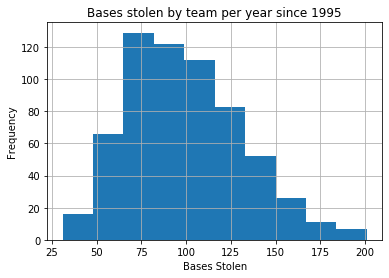

<IPython.core.display.Javascript object>

In [8]:
# stolen bases
teams_95.SB.hist()
plt.xlabel("Bases Stolen")
plt.ylabel("Frequency")
plt.title("Bases stolen by team per year since 1995")
plt.show()

* Wins

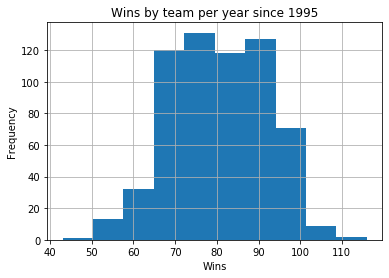

<IPython.core.display.Javascript object>

In [9]:
# Wins
teams_95.W.hist()
plt.xlabel("Wins")
plt.ylabel("Frequency")
plt.title("Wins by team per year since 1995")
plt.show()

* Earned Run Average

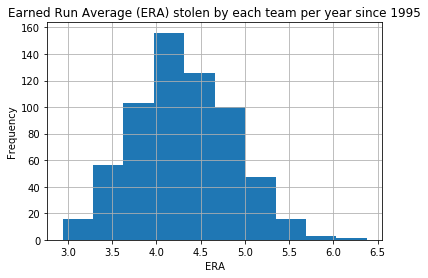

<IPython.core.display.Javascript object>

In [10]:
# Earned run average
teams_95.ERA.hist()
plt.xlabel("ERA")
plt.ylabel("Frequency")
plt.title("Earned Run Average (ERA) stolen by each team per year since 1995")
plt.show()

Stolen bases seems to skew right, with most bases stolen by a team a year being around 100. Most teams probably steal an average number of bases, while teams that steal significantly more may be interesting events based on the year or other factors. Wins skews left, meaning most teams are going to win an average amount, with some teams underperforming. There will be a ceiling effect, as there are only so many games in  year. Earned run average seems fairly normal, with a slight right skew. On most teams, most players will be average, so this feature is doubly affected by averaging affects. ERA is likewise likely pretty normal. Exact distribution identification requires further analysis.

* b. Conduct some further exploratory data analysis on this dataset. Consider qualities like distributions, correlations and trends over time. Try to find something interesting to say about the data, and use visualizations to support your argument.

Generate correlations for all columns

In [11]:
# teams_95.info()
'''
features of interest:
Rank
Ghome - games played at home
G - games played
HR - homeruns by batters
SOA - Strikeouts by pitchers
E - errors
'''
teams_95[['Rank', 'Ghome', 'G', 'HR', 'SOA', 'E', 'ERA']].corr()


,Rank,Ghome,G,HR,SOA,E,ERA
Rank,1.000000,-0.006942,0.016677,-0.348000,-0.264860,0.260938,0.514737
Ghome,-0.006942,1.000000,0.968998,0.139937,0.316842,-0.010314,-0.066828
G,0.016677,0.968998,1.000000,0.142903,0.322117,0.001897,-0.063006
HR,-0.348000,0.139937,0.142903,1.000000,-0.020532,0.005001,0.184277
SOA,-0.264860,0.316842,0.322117,-0.020532,1.000000,-0.276298,-0.626675
E,0.260938,-0.010314,0.001897,0.005001,-0.276298,1.000000,0.331587
ERA,0.514737,-0.066828,-0.063006,0.184277,-0.626675,0.331587,1.000000


<IPython.core.display.Javascript object>

Check for columns with significant nulls counts

In [12]:
# teams_95.isna().sum()

<IPython.core.display.Javascript object>

Look like only HBP and SF have null vales. Batters hit by pitch and sacrifice flies are not interesting

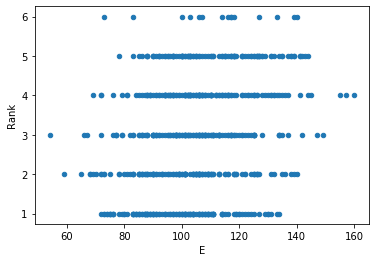

<IPython.core.display.Javascript object>

In [13]:
teams_95.plot.scatter(x="E", y="Rank")
plt.show()

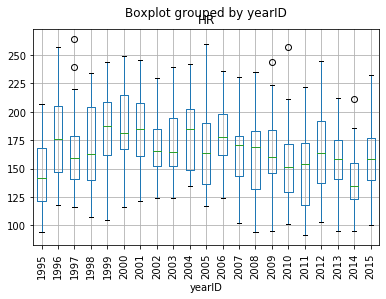

<IPython.core.display.Javascript object>

In [14]:
# could see if number of homeruns increases by years
# sports typically become more competitive over time
teams_95.boxplot(column='HR',by='yearID', rot=90)
plt.show()


Might be interesting to see if significant years, like when Barry Bonds broke the home run record in 2001, are enough to make the number of home runs significantly higher that year. Since that year doesn't even have an outlier, and all the plots are overlapping in spread, my guess is homeruns are not affected by

Earned run average and rank seem to be correlated, with r around 0.5

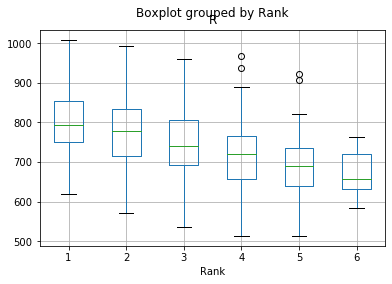

<IPython.core.display.Javascript object>

In [15]:
# teams_95.plot.scatter(x='Rank', y='ERA')
teams_95.boxplot(column="R", by="Rank")

Makes sense that the #1 teams have the highest averages of runs scored through the seasons. It also interesting how the lower ranked teams have less spread in their average. I would be interesting in finding where to bisect the data where the average runs of the top set is significantly greater thn the average of the bottom. Perhaps around a certain ranking teams are essentially indistinguishable?

Now I expected a negative correlation for Earned Runs Allowed, following similar principles.

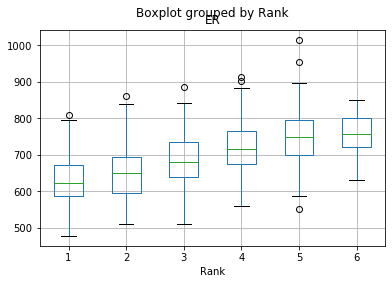

<IPython.core.display.Javascript object>

In [16]:
teams_95.boxplot(column="ER", by="Rank")
plt.show()

#### 4. Choose any two of the variables from 3. Draw 1,000 samples, taking the mean of 100 observations each time. Plot the frequencies of the sample means. What distribution does this appear to follow?
    
  * Hint: df['col'].sample(n=50) will draw 50 random observations from df['col'].


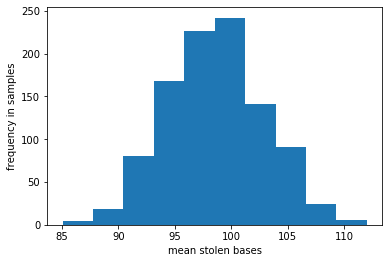

<IPython.core.display.Javascript object>

In [17]:
means = [mean(teams_95["SB"].sample(n=50)) for _ in range(1000)]

plt.hist(means)
plt.xlabel("mean stolen bases")
plt.ylabel("frequency in samples")
plt.show()

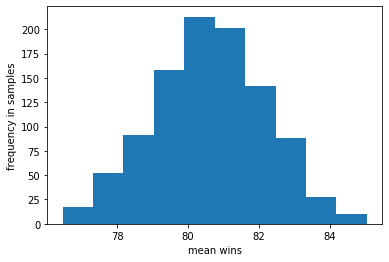

<IPython.core.display.Javascript object>

In [18]:
means = [mean(teams_95["W"].sample(n=50)) for _ in range(1000)]

plt.hist(means)
plt.xlabel("mean wins")
plt.ylabel("frequency in samples")
plt.show()

These two distributions are large samples of sampling means, therefore following a normal distribution and illustrating the central limit theorem.